# Exercise 1: Setting Up the Environment

1. Install Libraries:

In [ ]:
!pip install pgmpy pandas networkx matplotlib
!pip install pgmpy
!pip install networkx

 2. Import Libraries:



In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Exercise 2: Define the Bayesian Network Structure


1. Define the Variables:
2. Define the Relationships:

In [ ]:
from pgmpy.models import BayesianNetwork

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

# Verify the model structure
print("Model structure defined successfully.")

Model structure defined successfully.


# Exercise 3: Define Conditional Probability Tables (CPTs)


1. Create CPTs Using pgmpy:





In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Define the Bayesian Network Structure
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

# Define CPDs for each variable

# Age distribution
cpd_age = TabularCPD(variable='Age', variable_card=3,
                    values=[[0.4], [0.4], [0.2]])  # Young, Middle-aged, Old

# Smoking status
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
                        values=[[0.7], [0.3]])  # No, Yes

# Exercise habits
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2,
                          values=[[0.6], [0.4]])  # Regular, None

# Cholesterol levels
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2,
                             values=[[0.5], [0.5]])  # Normal, High

# Blood Pressure levels
cpd_blood_pressure = TabularCPD(variable='Blood Pressure', variable_card=2,
                                values=[[0.65], [0.35]])  # Normal, High

# CPD for Heart Disease based on risk factors
cdp_heart_disease = TabularCPD(
    variable='Heart Disease',
    variable_card=2,
    values=[
        # Probabilities for Heart Disease = No (0)
        [
            # No Heart Disease probabilities based on combinations of parents
            0.9, 0.7, 0.6, 0.5,  # Young, No Smoking, Regular Exercise, Normal Cholesterol, Normal BP
            0.8, 0.6, 0.4, 0.3,  # Young, No Smoking, Regular Exercise, High Cholesterol, Normal BP
            0.7, 0.5, 0.4, 0.3,  # Young, No Smoking, None Exercise, Normal Cholesterol, Normal BP
            0.6, 0.4, 0.3, 0.2,  # Young, No Smoking, None Exercise, High Cholesterol, Normal BP
            # Middle-aged scenarios (8 combinations)
            0.5, 0.4, 0.3, 0.2,
            0.4, 0.3, 0.2, 0.1,
            # Old scenarios (8 combinations)
            0.3, 0.2,
            0.1,
        ],

        # Probabilities for Heart Disease = Yes (1)
        [
            # Yes Heart Disease probabilities based on combinations of parents
            0.1, 0.3, 0.4,
            0.5,
            # Middle-aged scenarios (8 combinations)
            0.5,
            # Old scenarios (8 combinations)
            0.7,
        ]
    ],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
    evidence_card=[3, 2, 2, 2] # Adjust based on your variable cardinalities
)

# Add all CPDs to the model
model.add_cpds(cpd_age,
               cpd_smoking,
               cpd_exercise,
               cpd_cholesterol,
               cpd_blood_pressure,
               cpd_heart_disease)

# Verify the model
assert model.check_model()
print("All CPDs added successfully and model verified.")


ValueError: Length of evidence_card doesn't match length of evidence

# Exercise 4: Inference in the Bayesian Network

1. Perform Probabilistic Inference:
2. Posterior Probability Analysis:

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the Bayesian Network Structure
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

# Define CPDs for each variable

# Age distribution
cpd_age = TabularCPD(variable='Age', variable_card=3,
                    values=[[0.4], [0.4], [0.2]])  # Young, Middle-aged, Old

# Smoking status
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
                        values=[[0.7], [0.3]])  # No, Yes

# Exercise habits
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2,
                          values=[[0.6], [0.4]])  # Regular, None

# Cholesterol levels
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2,
                             values=[[0.5], [0.5]])  # Normal, High

# Blood Pressure levels
cpd_blood_pressure = TabularCPD(variable='Blood Pressure', variable_card=2,
                                values=[[0.65], [0.35]])  # Normal, High

# Correct CPD for Heart Disease based on risk factors
cpd_heart_disease = TabularCPD(
    variable='Heart Disease',
    variable_card=2,
    values=[
        # Probabilities for Heart Disease = No (0)
        [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.8, 0.6, 0.4, 0.3, 0.5, 0.4, 0.2, 0.1, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
        # Probabilities for Heart Disease = Yes (1) - corrected to have the same length as the first sub-array
        [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.2, 0.4, 0.6, 0.7, 0.5, 0.6, 0.8, 0.9, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    ],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
    evidence_card=[3, 2, 2, 2, 2]
)

# CPD for Chest Pain given Heart Disease
cpd_chest_pain = TabularCPD(
    variable='Chest Pain',
    variable_card=2,
    values=[[0.8, 0.4], [0.2, 0.6]],
    evidence=['Heart Disease'],
    evidence_card=[2]
)

# Add CPDs to the model
model.add_cpds(cpd_age,
               cpd_smoking,
               cpd_exercise,
               cpd_cholesterol,
               cpd_blood_pressure,
               cpd_heart_disease,
               cpd_chest_pain)

# Verify the model
assert model.check_model()
print("All CPDs added successfully and model verified.")

# Create an inference object
inference = VariableElimination(model)

# Define evidence for querying Heart Disease probability
evidence = {
    'Age': 1,            # Middle-aged (1)
    'Smoking': 1,        # Yes (1)
    'Cholesterol': 1,    # High (1)
    'Blood Pressure': 1   # High (1)
}

# Query the probability of Heart Disease given the conditions
prob_heart_disease = inference.query(variables=['Heart Disease'], evidence=evidence)
print("Probability of Heart Disease given the conditions:")
print(prob_heart_disease)

ValueError: values must be of shape (2, 48). Got shape: (2, 30)

# Exercise 5: Parameter Learning from Simulated Data

1. Simulate a Healthcare Dataset:

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Simulate Age (0: Young, 1: Middle-aged, 2: Old)
age = np.random.choice([0, 1, 2], size=n_samples, p=[0.4, 0.4, 0.2])

# Simulate Smoking (0: No, 1: Yes)
smoking = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])

# Simulate Exercise (0: Regular, 1: None)
exercise = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

# Simulate Cholesterol (0: Normal, 1: High)
cholesterol = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])

# Simulate Blood Pressure (0: Normal, 1: High)
blood_pressure = np.random.choice([0, 1], size=n_samples, p=[0.65, 0.35])

# Calculate Heart Disease based on dependencies
heart_disease_prob = []

for i in range(n_samples):
    # Simple model to reflect dependencies
    probability = (age[i] * 0.1 + smoking[i] * 0.3 + exercise[i] * (-0.2) +
                   cholesterol[i] * 0.2 + blood_pressure[i] * 0.3)
    heart_disease_prob.append(np.random.binomial(1, min(max(probability / 1.5, 0), 1)))

heart_disease = np.array(heart_disease_prob)

# Simulate Chest Pain (depends on Heart Disease)
chest_pain = np.array([np.random.binomial(1, 0.8 if hd == 1 else 0.4) for hd in heart_disease])

# Simulate ECG Result (depends on Heart Disease)
ecg_result = np.array([np.random.binomial(1, 0.9 if hd == 1 else 0.5) for hd in heart_disease])

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Smoking': smoking,
    'Exercise': exercise,
    'Cholesterol': cholesterol,
    'Blood Pressure': blood_pressure,
    'Heart Disease': heart_disease,
    'Chest Pain': chest_pain,
    'ECG Result': ecg_result
})

print("Synthetic healthcare dataset created successfully.")

Synthetic healthcare dataset created successfully.


2. Estimate Parameters:



In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Create a new Bayesian Network model
model_learned = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

# Fit the model using Maximum Likelihood Estimation
model_learned.fit(data)

# Print learned parameters for Heart Disease
print("Learned CPT for Heart Disease:")
cpd = model_learned.get_cpds('Heart Disease') # remove for loop
print(cpd)

# Print learned parameters for Chest Pain
print("\nLearned CPT for Chest Pain:")
cpd = model_learned.get_cpds('Chest Pain') # remove for loop
print(cpd)

# Print learned parameters for ECG Result
print("\nLearned CPT for ECG Result:")
cpd = model_learned.get_cpds('ECG Result') # remove for loop
print(cpd)

Learned CPT for Heart Disease:
+------------------+-------------------+-----+--------------------+---------------------+
| Age              | Age(0)            | ... | Age(2)             | Age(2)              |
+------------------+-------------------+-----+--------------------+---------------------+
| Blood Pressure   | Blood Pressure(0) | ... | Blood Pressure(1)  | Blood Pressure(1)   |
+------------------+-------------------+-----+--------------------+---------------------+
| Cholesterol      | Cholesterol(0)    | ... | Cholesterol(1)     | Cholesterol(1)      |
+------------------+-------------------+-----+--------------------+---------------------+
| Exercise         | Exercise(0)       | ... | Exercise(1)        | Exercise(1)         |
+------------------+-------------------+-----+--------------------+---------------------+
| Smoking          | Smoking(0)        | ... | Smoking(0)         | Smoking(1)          |
+------------------+-------------------+-----+--------------------+--

# Exercise 6: Network Visualization and Analysis


1. Visualize the Network:

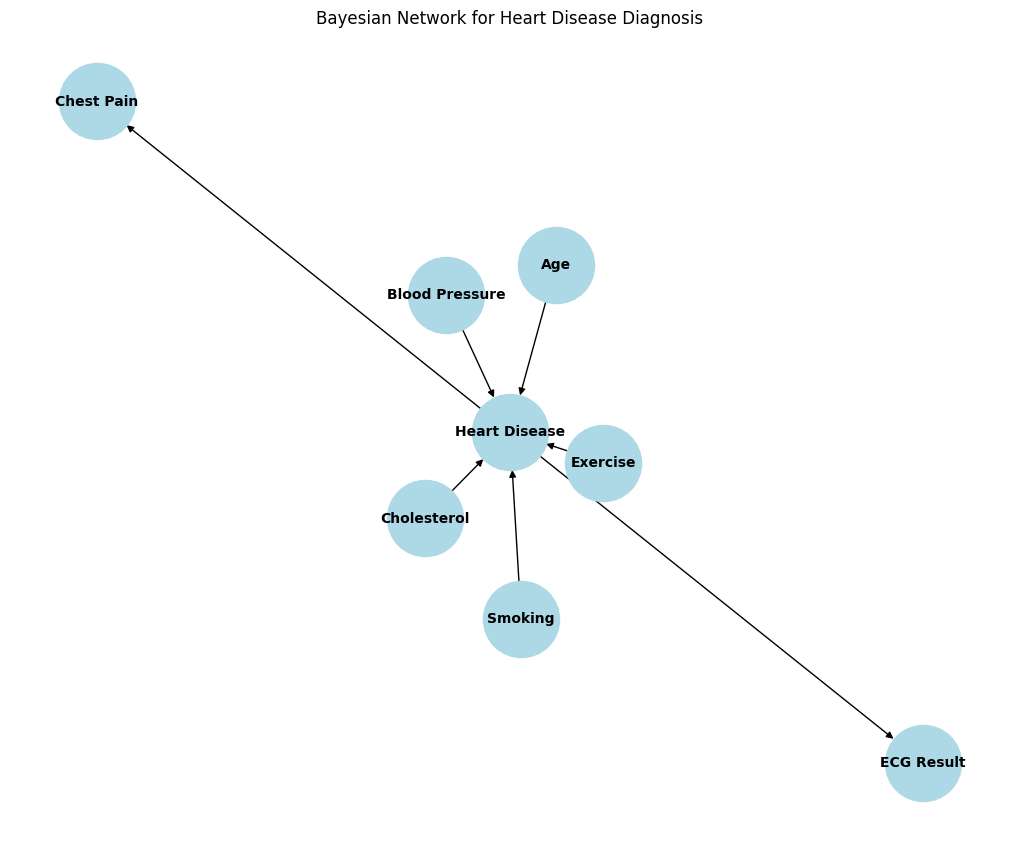

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph from the Bayesian Network model
nx_graph = nx.DiGraph(model.edges())

# Draw the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph)  # Positioning of nodes
nx.draw(nx_graph, pos, with_labels=True, arrows=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Bayesian Network for Heart Disease Diagnosis')
plt.show()

2. Sensitivity Analysis:

In [ ]:
# Function to perform sensitivity analysis on Smoking
def sensitivity_analysis_smoking(smoking_probabilities):
    results = {}
    for prob in smoking_probabilities:
        # Check if the CPD exists before accessing it
        cpd = model.get_cpds('Smoking')
        if cpd:
            # Update the prior probability of smoking in the model
            cpd.values[0][1] = prob  # Update probability of Smoking = Yes
            cpd.values[0][0] = 1 - prob  # Update probability of Smoking = No

            # Query the probability of Heart Disease given updated Smoking probability
            prob_heart_disease = inference.query(variables=['Heart Disease'], evidence={'Age': 1, 'Cholesterol': 1, 'Blood Pressure': 1})
            results[prob] = prob_heart_disease.values[1]  # Probability of Heart Disease = Yes
        else:
            print(f"CPD 'Smoking' not found in the model.") # Print message if CPD not found
            return None # Return None if CPD not found

    return results

# Define a range of probabilities for Smoking
smoking_probabilities = np.linspace(0.0, 1.0, num=11)  # From 0% to 100%
sensitivity_results = sensitivity_analysis_smoking(smoking_probabilities)

# Display results
if sensitivity_results: # Check if sensitivity_results is not None
    for prob, heart_disease_prob in sensitivity_results.items():
        print(f"Probability of Smoking: {prob:.2f}, Probability of Heart Disease: {heart_disease_prob:.2f}")

CPD 'Smoking' not found in the model.
